In [2]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


train_data = pd.read_csv("survey lung cancer.csv")


train_data = train_data.dropna()


X_train = train_data.drop('LUNG_CANCER', axis=1)
y_train = train_data['LUNG_CANCER']


X_train = pd.get_dummies(X_train, drop_first=True)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


new_data = pd.read_csv("predict_data.csv")


new_data = new_data.fillna(0)


X_new = pd.get_dummies(new_data, drop_first=True)


X_new = X_new.reindex(columns=X_train.columns, fill_value=0)


predictions = model.predict(X_new)


new_data['predicted_lung_cancer'] = predictions


print(new_data)
new_data.to_csv("predictions_random_forest.csv", index=False)

predictions = pd.read_csv("predictions_random_forest.csv")
original = pd.read_csv("survey lung cancer.csv")


merged = pd.merge(
    predictions,
    original,
    on=["GENDER", "AGE", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE",
        "CHRONIC DISEASE", "FATIGUE ", "ALLERGY ", "WHEEZING", "ALCOHOL CONSUMING",
        "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"],
    suffixes=('_predicted', '_true')
)


correct = (merged['predicted_lung_cancer'] == merged['LUNG_CANCER']).sum()
total = len(merged)
accuracy = (correct / total) * 100

print(f"Accuracy: {accuracy:.2f}%") 

pred_df = pd.read_csv("predictions_random_forest.csv")
pred_df["predicted_lung_cancer"]= pred_df["predicted_lung_cancer"].map({"YES":1,"NO":0})
pred_labels= pred_df["predicted_lung_cancer"]
true_labels= train_data["LUNG_CANCER"].map({"YES":1,"NO":0})

precision_scr = precision_score(true_labels,pred_labels)
print("Pecision score : ",precision_scr)

recall_scr = recall_score(true_labels, pred_labels)
print("Recall score:", recall_scr)


f1_scr = f1_score(true_labels,pred_labels)
print("F1 score:", f1_scr)




mcc = matthews_corrcoef(true_labels, pred_labels)
print("MCC score:", mcc)



auroc_scr = roc_auc_score(true_labels, pred_labels)
print("AUROC score:", auroc_scr)



    GENDER  AGE  ...  CHEST PAIN  predicted_lung_cancer
0        M   69  ...           2                    YES
1        M   74  ...           2                    YES
2        F   59  ...           2                     NO
3        M   63  ...           2                     NO
4        F   63  ...           1                     NO
..     ...  ...  ...         ...                    ...
304      F   56  ...           1                    YES
305      M   70  ...           2                    YES
306      M   58  ...           2                    YES
307      M   67  ...           2                    YES
308      M   62  ...           1                    YES

[309 rows x 16 columns]
Accuracy: 99.47%
Pecision score :  0.996309963099631
Recall score: 1.0
F1 score: 0.9981515711645101
MCC score: 0.9852733396318932
AUROC score: 0.9871794871794871


Confusion Matrix:
[[ 38   1]
 [  0 270]]


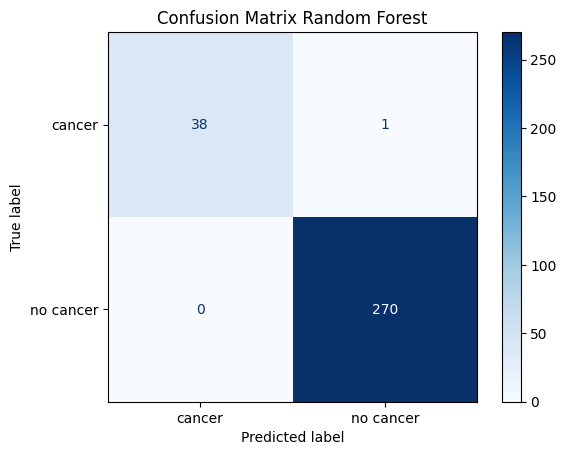

In [4]:
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cancer","no cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Random Forest')
plt.show()